In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [4]:
print(torch.__version__)

1.2.0


In [15]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  

In [16]:
x, y = Variable(x), Variable(y)

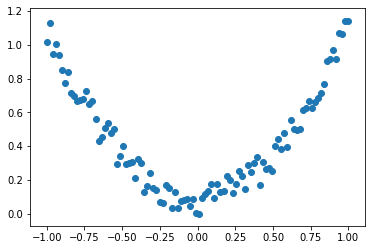

In [17]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [18]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hiddens, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hiddens)
        self.predict = torch.nn.Linear(n_hiddens, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [19]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


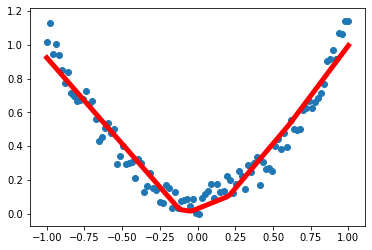

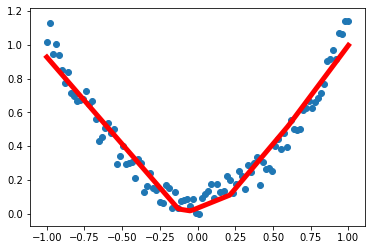

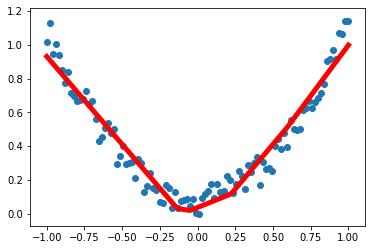

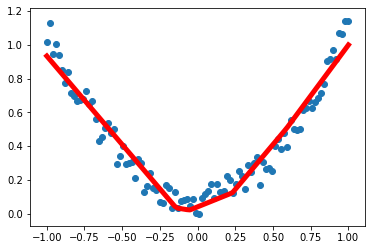

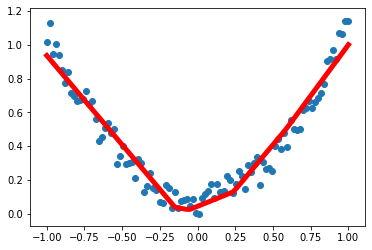

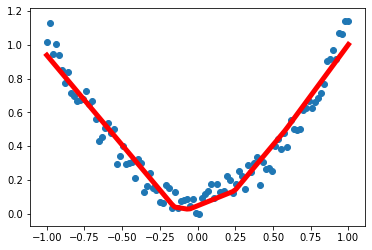

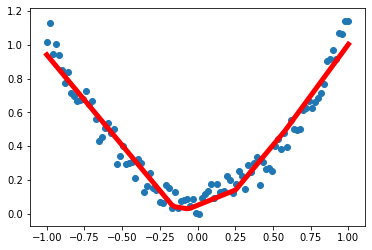

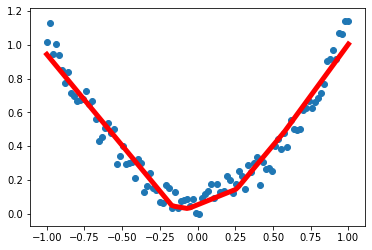

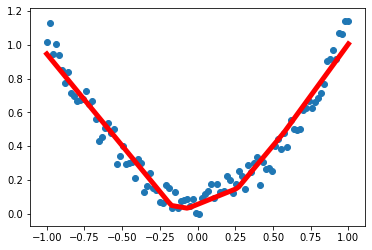

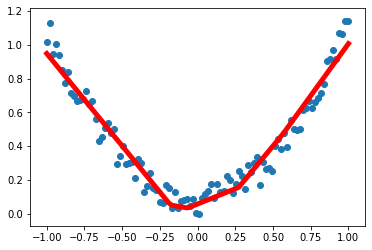

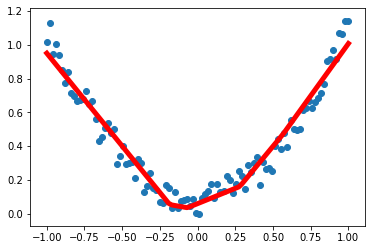

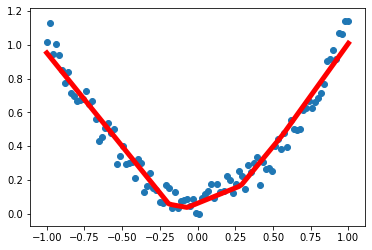

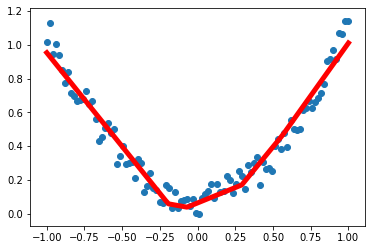

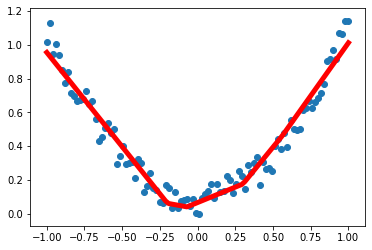

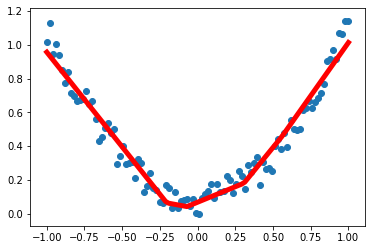

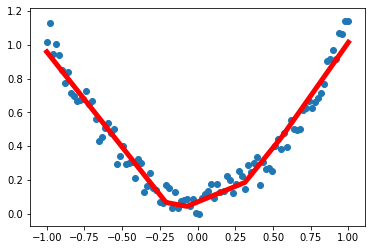

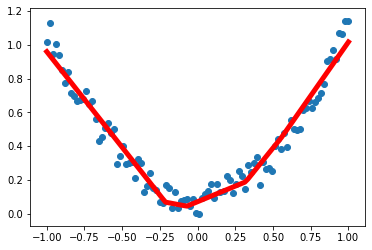

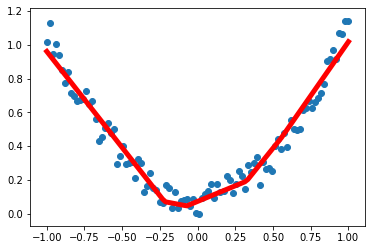

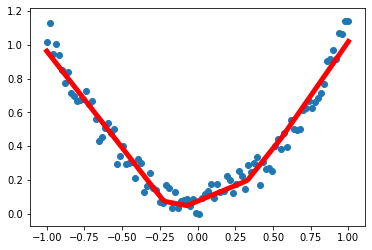

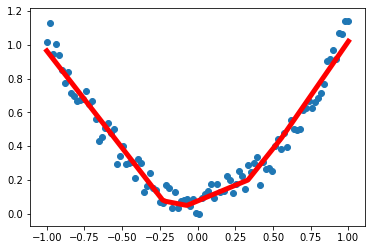

In [25]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.3)
loss_func = torch.nn.MSELoss()
plt.ion()   # 画图
plt.show()

for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction,  y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()